#### No último ano, o XVendas apresentou perda gradual na rentabilidade. Sabe-se que o volume de vendas permaneceu estável durante o período.

#### O que pode ser a causa desse comportamento?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("Case_Analista_Intelligence.xlsx")

In [34]:
data.head()

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
0,1,AC AUDIO,80353.50458,36247.578746,11352.354514
1,1,AC BT SPEAKER,45448.46538,82168.278219,19423.724235
2,1,AC CALCULADORA,2253.74290,3309.124869,813.303043
3,1,AC CELULARES,22829.13170,18308.656441,5471.035672
4,1,AC ELETRODOMESTICO,432.07736,76.286501,33.111653


#### Análise exploratória e limpeza dos dados 

In [35]:
# Varificando valores nulos 
data.isnull().sum()

Mês                   0
Categoria             0
Custo Entrega         0
Custo dos Produtos    0
Custo Marketing       0
dtype: int64

In [36]:
# Chacando se há valores duplicados 
data.duplicated().sum()

0

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mês                 3521 non-null   int64  
 1   Categoria           3521 non-null   object 
 2   Custo Entrega       3521 non-null   float64
 3   Custo dos Produtos  3521 non-null   float64
 4   Custo Marketing     3521 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 137.7+ KB


In [38]:
def formato(obj):
    formatado = "{:.2f}".format(obj)
    return formatado

In [39]:
data["Custo Entrega"] = data["Custo Entrega"].apply(formato).astype(float)
data["Custo dos Produtos"] = data["Custo dos Produtos"].apply(formato).astype(float)
data["Custo Marketing"] = data["Custo Marketing"].apply(formato).astype(float)

data.head()

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
0,1,AC AUDIO,80353.50,36247.58,11352.35
1,1,AC BT SPEAKER,45448.47,82168.28,19423.72
2,1,AC CALCULADORA,2253.74,3309.12,813.30
3,1,AC CELULARES,22829.13,18308.66,5471.04
4,1,AC ELETRODOMESTICO,432.08,76.29,33.11


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mês                 3521 non-null   int64  
 1   Categoria           3521 non-null   object 
 2   Custo Entrega       3521 non-null   float64
 3   Custo dos Produtos  3521 non-null   float64
 4   Custo Marketing     3521 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 137.7+ KB


In [41]:
data.tail()

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
3516,9,VIAGEM,1930.53,37.75,10.54
3517,9,WEARABLES SAMSUNG,27508.44,6713.25,1878.91
3518,9,WIFI,154397.65,34849.36,6376.27
3519,9,WIFI 3G,45827.13,5029.09,1210.24
3520,9,WIFI 4G,44880.86,44497.06,9358.32


In [42]:
media_Custo_Entrega = data.groupby('Mês')['Custo Entrega'].mean()
media_Custo_Produtos = data.groupby('Mês')['Custo dos Produtos'].mean()
media_Custo_Marketing = data.groupby('Mês')['Custo Marketing'].mean()


dp_Custo_Entrega = data.groupby('Mês')['Custo Entrega'].std()
dp_Custo_Produtos = data.groupby('Mês')['Custo dos Produtos'].std()
dp_Custo_Marketing = data.groupby('Mês')['Custo Marketing'].std()

In [43]:
data_resumo = {
    'Media_Custo_Entrega': media_Custo_Entrega,
    'Media_Custo_Produtos': media_Custo_Produtos,
    'Media_Custo_Marketing': media_Custo_Marketing,
    'dp_Custo_Entrega':dp_Custo_Entrega,
    'dp_Custo_Produtos': dp_Custo_Produtos,
    'dp_Custo_Marketing': dp_Custo_Marketing,

}

In [44]:
data2= pd.DataFrame(data_resumo)
data2

,Media_Custo_Entrega,Media_Custo_Produtos,Media_Custo_Marketing,dp_Custo_Entrega,dp_Custo_Produtos,dp_Custo_Marketing
Mês,,,,,,
1,157565.476726,1.330653e+06,356692.157208,1.547800e+06,1.964089e+07,4.990579e+06
2,152808.491209,1.310278e+06,371407.848564,3.790290e+05,1.150910e+07,3.172498e+06
3,193785.042152,1.356935e+06,348062.286253,4.879490e+05,8.532848e+06,2.035406e+06
4,233512.265410,1.367826e+06,340621.450436,7.053690e+05,8.335182e+06,1.982132e+06
5,260364.771756,1.408626e+06,265745.046412,7.824143e+05,1.472675e+07,2.717987e+06
6,318971.633204,1.398158e+06,248428.121292,9.890833e+05,1.121389e+07,2.018921e+06
7,408063.062327,1.326520e+06,235880.853325,4.026117e+06,1.358975e+07,2.084675e+06
8,454443.888036,1.414887e+06,242543.935452,8.027110e+06,1.700857e+07,3.155619e+06
9,557535.815349,1.343373e+06,215725.438527,1.478730e+06,2.131037e+07,3.168555e+06


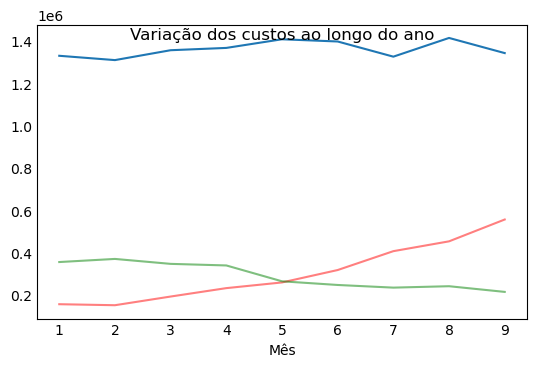

In [45]:
fig,ax = plt.subplots(figsize=(5, 3))
ax.plot(data2.index,data2["Media_Custo_Entrega"],color='r',alpha=.50)
ax.plot(data2.index,data2["Media_Custo_Produtos"])
ax.plot(data2.index,data2["Media_Custo_Marketing"],color='g',alpha=.50)
fig.suptitle("Variação dos custos ao longo do ano")
ax.set_xlabel("Mês")
ax.grid(False)


In [46]:
linha_maior_entrega = data.loc[data['Custo Entrega'].idxmax()]
segundo_maior_entrega = data.nlargest(2, 'Custo Entrega').iloc[-1]

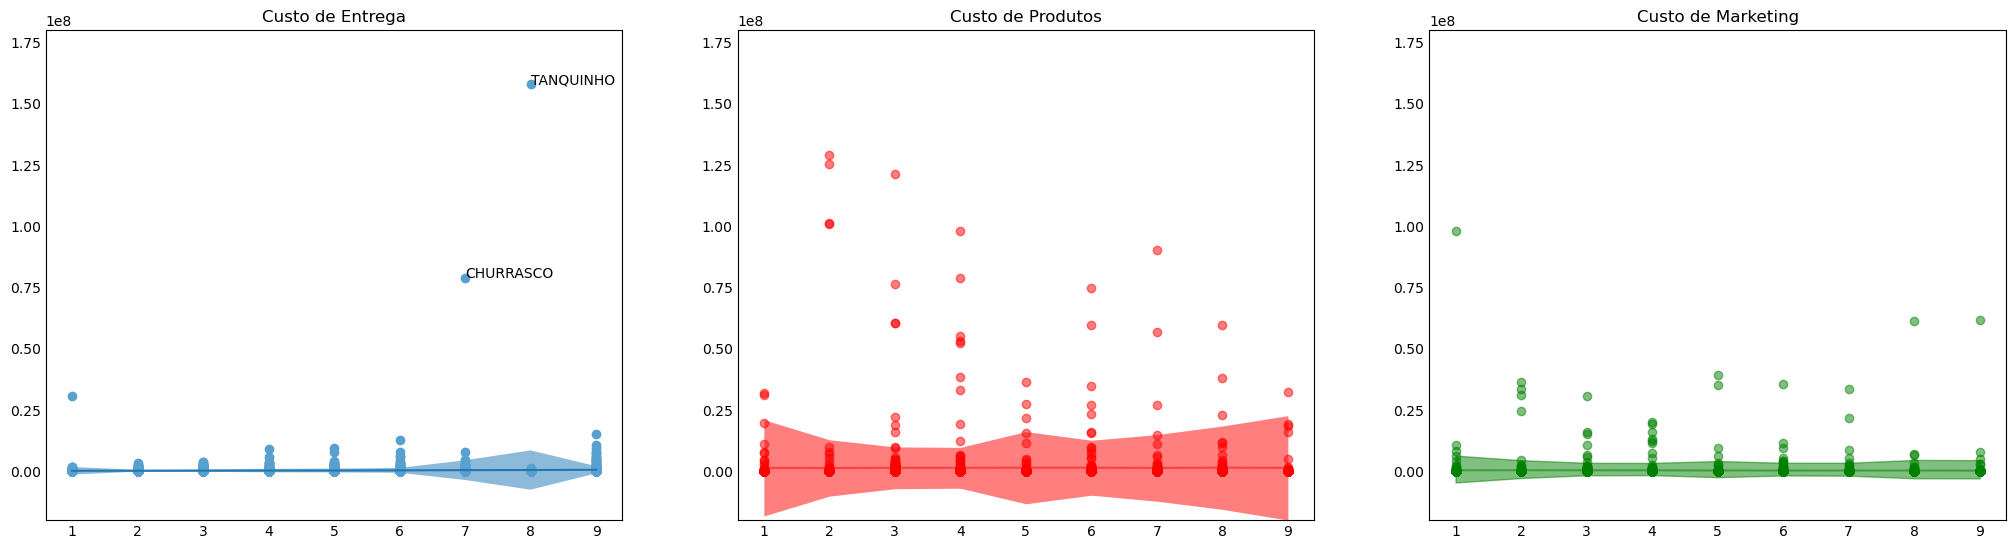

In [47]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
plt.style.use('_mpl-gallery')
ax[0].fill_between(data2.index, media_Custo_Entrega-dp_Custo_Entrega, media_Custo_Entrega+dp_Custo_Entrega, alpha=.5, linewidth=0)
ax[0].plot(data2.index,data2["Media_Custo_Entrega"])
ax[0].scatter(data["Mês"],data["Custo Entrega"])
ax[0].set_ylim(-.2e8, 1.8e8)
ax[0].text(8,linha_maior_entrega["Custo Entrega"],linha_maior_entrega["Categoria"])
ax[0].text(segundo_maior_entrega["Mês"],segundo_maior_entrega["Custo Entrega"],segundo_maior_entrega["Categoria"])
ax[0].set_title("Custo de Entrega")
ax[0].grid(False)

ax[1].fill_between(data2.index, data2["Media_Custo_Produtos"]-data2["dp_Custo_Produtos"], data2["Media_Custo_Produtos"]+data2["dp_Custo_Produtos"], alpha=.5, linewidth=0,color='r')
ax[1].plot(data2.index,data2["Media_Custo_Produtos"],color='r',alpha=.50)
ax[1].scatter(data["Mês"],data["Custo dos Produtos"],color='r',alpha=.50)
ax[1].set_ylim(-.2e8, 1.8e8)
ax[1].set_title("Custo de Produtos")
ax[1].grid(False)

ax[2].fill_between(data2.index, data2["Media_Custo_Marketing"]-data2["dp_Custo_Marketing"], data2["Media_Custo_Produtos"]+data2["dp_Custo_Marketing"], alpha=.5, color='g')
ax[2].plot(data2.index,data2["Media_Custo_Marketing"],color='g',alpha=.50)
ax[2].scatter(data["Mês"],data["Custo Marketing"],color='g',alpha=.50)
ax[2].set_ylim(-.2e8, 1.8e8)
ax[2].set_title("Custo de Marketing")
ax[2].grid(False)


In [48]:
data.sort_values(by='Custo Entrega',ascending=False)

,Mês,Categoria,Custo Entrega,Custo dos Produtos,Custo Marketing
3112,8,TANQUINHO,1.579374e+08,3.262112e+08,61256346.68
2485,7,CHURRASCO,7.884671e+07,7.757779e+04,2440369.96
121,1,CASA CONECTADA,3.054578e+07,2.654726e+04,550147.80
3472,9,REFRIGERADOR,1.524930e+07,1.112504e+06,330963.78
2320,6,SMARTPHONE,1.272910e+07,5.951512e+07,9393167.60
...,...,...,...,...,...
44,1,ANIMAIS,0.000000e+00,7.300000e-01,0.22
1134,3,RECEIVER,0.000000e+00,2.689600e+02,75.19
163,1,CONVERSOR DIGITAL,0.000000e+00,1.250000e+00,0.27
2751,8,AC ELETRODOMESTICO,0.000000e+00,6.800000e+00,1.31


Considerando que o volume das vendas permaneceu estável durante o perído, a queda gradual na rentabilidade pode ser explicada principalmente pelo aumento dos custos de entrega, visto que os custos de marketing e custos dos produtos permenceram praticamente estáveis ao longo de todo o período. Nos meses 7 e 8, no entanto, podemos notar que houve um aumento considerável, com destaque para as categorias Tanquiho e Churrasco.